In [ ]:
!pip uninstall -y kaleido
!pip install kaleido==0.2.1



Found existing installation: kaleido 1.1.0
Uninstalling kaleido-1.1.0:
  Successfully uninstalled kaleido-1.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.9 MB/s eta 0:00:00:00:0100:01


In [2]:
import kaleido
import plotly
print (plotly.__version__)
import pandas  as pd
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook'
# pio.renderers.default = "kaggle"  

from IPython.display import Image, display
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns



5.24.1


In [3]:
train_df=pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


None

   y     cnt     dolya
0  0  659512  0.879349
1  1   90488  0.120651


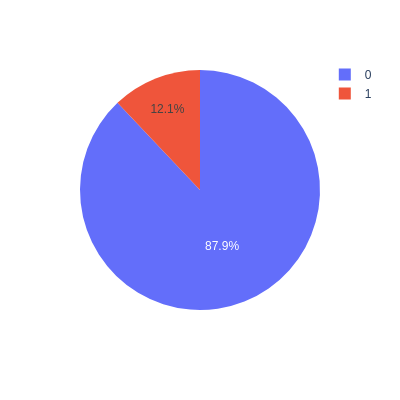

In [4]:
from IPython.display import IFrame, HTML, display
# train_df['id'].nunique()
print(train_df['y'].value_counts().reset_index(name='cnt').assign(dolya=lambda x: x['cnt']/x['cnt'].sum()))
fig_y=px.pie(train_df, names='y', height=400, width=400)
fig_y.show('png')

# fig_y.write_html('pie_y.html')
# display(IFrame(src='pie_y.html', width=500, height=700))



# html_str=fig_y.to_html(include_plotlyjs='cdn')
# display(HTML(html_str))

# train_df.describe()

In [6]:
df_nun=train_df.nunique().drop('y').reset_index(name='nunique').query('nunique<20')
# df_nun
cat_cols=df_nun['index'].to_list()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

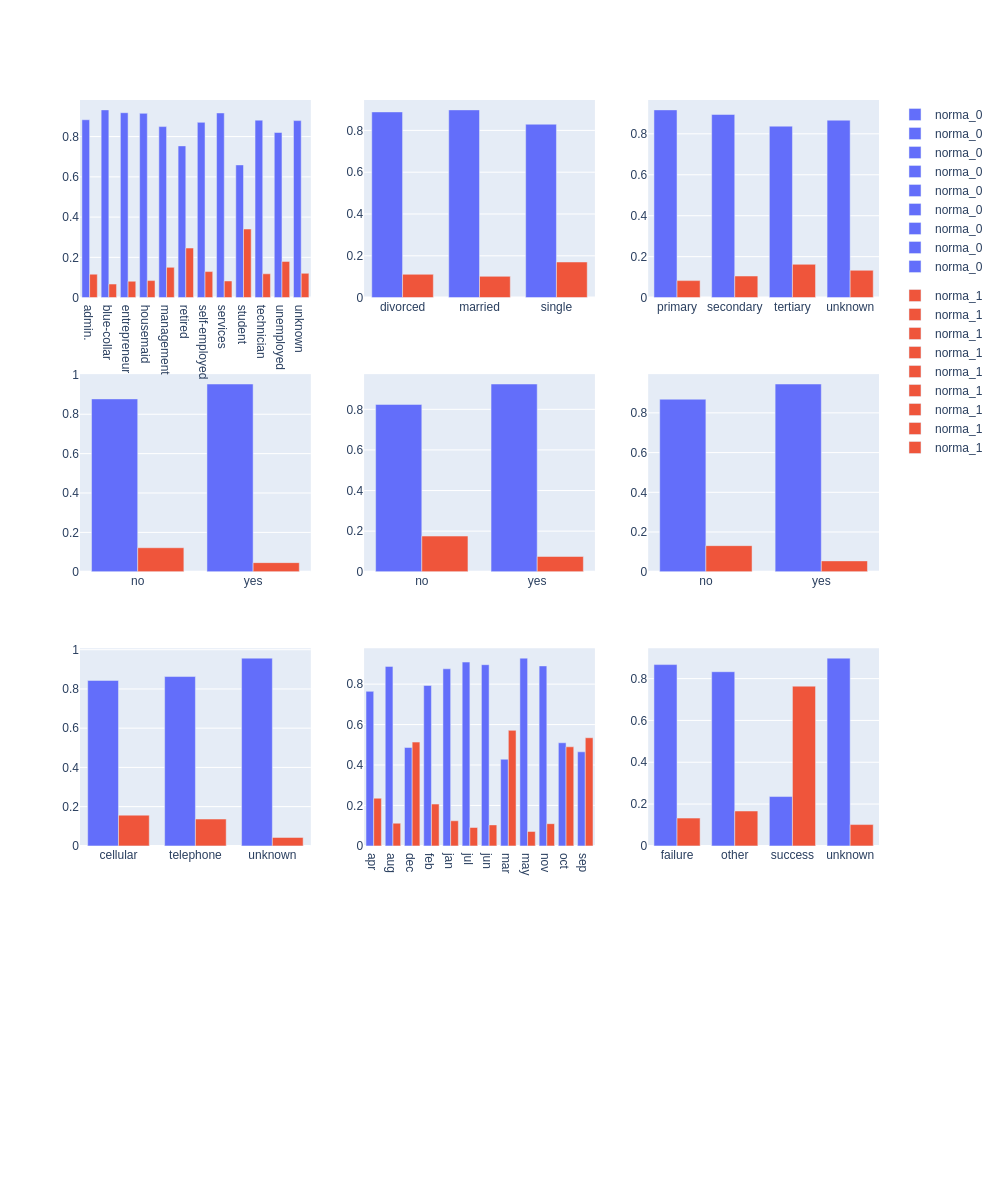

{'job': ['management', 'retired', 'student', 'unemployed'],
 'marital': ['single'],
 'education': ['tertiary', 'unknown'],
 'default': ['no'],
 'housing': ['no'],
 'loan': ['no'],
 'contact': ['cellular', 'telephone'],
 'month': ['dec', 'mar', 'oct', 'sep'],
 'poutcome': ['success']}

In [7]:
fig=make_subplots(rows=4, cols=3)
# fig.print_grid()
dct_cat={}
for i,c in enumerate(cat_cols):
    
    row=i//3+1
    col=i%3+1
    df_i=pd.crosstab(train_df[c], train_df['y']).assign(total=lambda x: x.sum(axis=1)).assign( norma_0=lambda x: x[0]/x['total']).reset_index()
    df_i['norma_1']=df_i[1]/df_i['total']
    av_norma_1=df_i['norma_1'].mean()
    # display(c,df_i.query('norma_1>@av_norma_1')[c].to_list())
    dct_cat[c]=df_i.query('norma_1>@av_norma_1')[c].to_list()
    # print(df_i)
    fig_i=px.bar(df_i, x=c, y=['norma_0','norma_1'], barmode='group', title=c)
    # fig_i.show()
    for trace in fig_i.data:
        fig.add_trace(trace, row=row, col=col)
fig.update_layout(height=1200, width=1000)    
fig.show('png')
dct_cat


['campaign', 'pdays', 'previous', 'day', 'duration', 'age', 'balance']


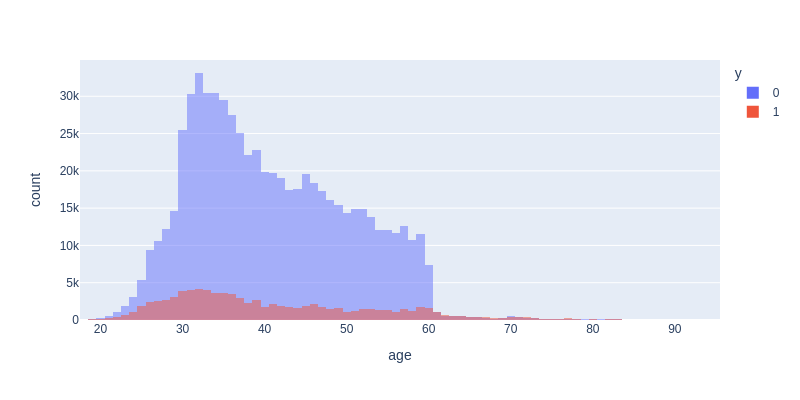

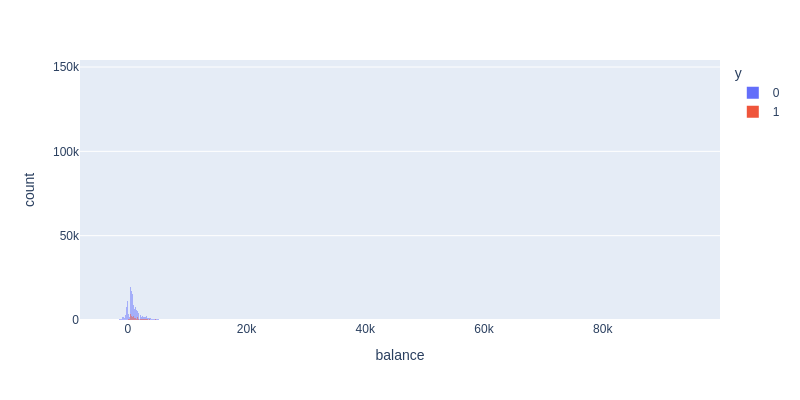

In [8]:
chisl_cols=list(set(train_df.columns.drop(['y','id']).to_list())-set(cat_cols))
print(chisl_cols)
for i,c in enumerate(chisl_cols[-2:]):
    hist_i=px.histogram(train_df, x=c, color='y', barmode='overlay', height=400, width=800)
    hist_i.show('png')

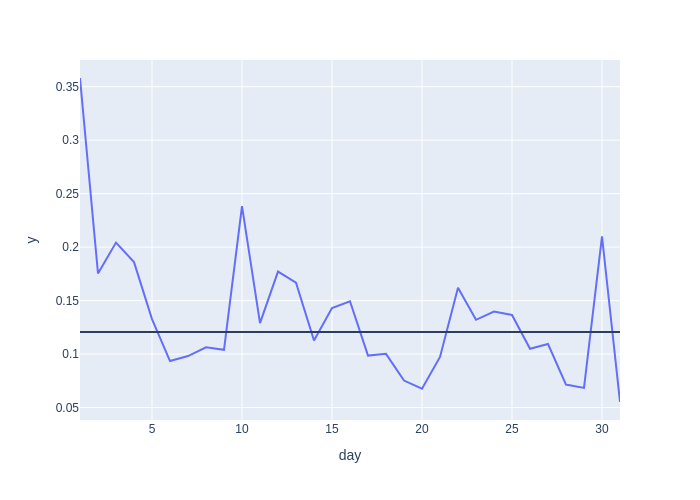

In [9]:
# изучение days
day_bse=train_df.groupby('day', as_index=False)['y'].mean()
av_day=train_df['y'].mean()
fig_d=px.line(day_bse, x='day', y='y')
fig_d.add_hline(y=av_day)
fig_d.show('png')

In [10]:
dct_cat

{'job': ['management', 'retired', 'student', 'unemployed'],
 'marital': ['single'],
 'education': ['tertiary', 'unknown'],
 'default': ['no'],
 'housing': ['no'],
 'loan': ['no'],
 'contact': ['cellular', 'telephone'],
 'month': ['dec', 'mar', 'oct', 'sep'],
 'poutcome': ['success']}

In [11]:
def create_features(df):
    df=df.copy()

    ### cats
    df['education_dop']=df['education'].isin(['tertiary']).astype(int)
    df['job_dop']=df['job'].isin(dct_cat.get('job')).astype(int)
    df['month_dop']=df['month'].isin(dct_cat.get('month')).astype(int)
    df['poutcome_dop']=df['poutcome'].isin(dct_cat.get('poutcome')).astype(int)
    df['no_passive_dop']=((df['loan']=='no') &(df['housing']=="no")).astype(int)

    df['job_nopass_dop']=df['job_dop']*df['no_passive_dop']
    df['education_marital_dop']=df['education_dop']*(df['marital']=='single').astype(int)
    df['job_marital']=df['job_dop']*(df['marital']=="single").astype(int)
    
    ### chislovie
    # df['day_category']=df['day'].astype('category') ### плохо работают tree_model
    df['day_1_10_30']=(df['day'].isin([1,10,30])).astype(int)
    # df['day_of_week']=df['day']%7 ### плохо работают tree_model

    # df['dur_binned']=pd.cut(df['duration'],bins=[0,120,300,600,np.inf], labels=[0,1,2,3]) ### плохо работают tree_model
    df['dur_important']=(df['duration']>300).astype(int)
    
    
    return df

train_df_dop=create_features(train_df)
test_df_dop=create_features(test_df)

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

label_enc={}
for col in cat_cols:
    le=LabelEncoder()
    train_df_dop[col]=le.fit_transform(train_df_dop[col].astype(str))
    test_df_dop[col]=le.transform(test_df_dop[col].astype(str))
    label_enc[col]=le

train_df_dop[cat_cols]=train_df_dop[cat_cols].astype('category')

In [13]:
scaler=StandardScaler()
for c in chisl_cols:
    # display(scaler.fit_transform(train_df_dop[col].values.reshape(-1,1)).flatten())
    train_df_dop[c]=scaler.fit_transform(train_df_dop[c].values.reshape(-1,1)).flatten()
    test_df_dop[c]-scaler.transform(test_df_dop[c].values.reshape(-1,1)).flatten()

print(f"До age srednee - {train_df['age'].mean():.2f}, std - {train_df['age'].std():.2f}")
print(f"POsle age srednee - {train_df_dop['age'].mean():.2f}, std - {train_df_dop['age'].std():.2f}")


До age srednee - 40.93, std - 10.10
POsle age srednee - -0.00, std - 1.00


In [14]:
# train_df['contact'].unique()
for i,v in enumerate(label_enc['contact'].classes_):
    print(i , v)

0 cellular
1 telephone
2 unknown


In [15]:
X=train_df_dop.drop(['id','y'],axis=1)
y=train_df_dop['y']
X_test=test_df_dop.drop('id', axis=1)

X_train, X_val,y_train, y_val=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(f"Train - {X_train.shape}, Val - {X_val.shape}, Test - {X_test.shape}")

Train - (600000, 26), Val - (150000, 26), Test - (250000, 26)


In [16]:
### Запускаем модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report

In [14]:
params_lr={'random_state':42,'max_iter':1000}
lr=LogisticRegression(**params_lr)
lr.fit(X_train,y_train)
lr_pred=lr.predict_proba(X_val)[:,1]
lr_auc=roc_auc_score(y_val,lr_pred)
print(f"{lr} AUC - {lr_auc:.4f}")

LogisticRegression(max_iter=1000, random_state=42) AUC - 0.9382


In [15]:
params_lgb_cl={'random_state':42}
lgb_cl=lgb.LGBMClassifier(**params_lgb_cl)
lgb_cl.fit(X_train,y_train)
lgb_pred=lgb_cl.predict_proba(X_val)[:,1]
lgb_auc=roc_auc_score(y_val, lgb_pred)
print(f"{lgb_cl} AUC - {lgb_auc:.4f}")

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
LGBMClassifier(random_state=42) AUC - 0.9657


In [16]:
params_lgb_balanced={'random_state':42,'class_weight':'balanced','scale_pos_weight':527610/72390,'n_estimators':300}
lgb_balanced=lgb.LGBMClassifier(**params_lgb_balanced)
lgb_balanced.fit(X_train, y_train)
lgb_balanced_pred=lgb_balanced.predict_proba(X_val)[:,1]
lgb_balanced_auc=roc_auc_score(y_val, lgb_balanced_pred)
print(f"{lgb_balanced} AUC - {lgb_balanced_auc:.4f}")

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LGBMClassifier(class_weight='balanced', n_estimators=300, random_state=42,
               scale_pos_weight=7.288437629506838) AUC - 0.9663


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

param_grid={
    'n_estimators':[100,200,300],
    'learning_rate':[0.05,0.1,0.15],
    'max_depth':[3,5,7],
    'num_leaves':[31,63,127],
    'subsample':[0.8,0.9,1.0]
}
lgb_optim=lgb.LGBMClassifier(random_state=42)
random_search=RandomizedSearchCV(lgb_optim, param_grid, n_iter=20, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f"Лучшие параметры", random_search.best_params_)
print(f"Kexibq AUC", random_search.best_score_)

[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.250352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.255565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 24[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 24

[Lig

In [18]:
### Ансамбль 1
from sklearn.ensemble import VotingClassifier
X_lgb=X_train[['day_1_10_30','dur_important']+chisl_cols]
X_lr=X_train

params_voting={'estimators':[('lr',lr),('lgb',lgb_balanced)],'voting':'soft'}
voting_clf=VotingClassifier(**params_voting)

voting_clf.fit(X_lr, y_train)
y_pred_voting=voting_clf.predict_proba(X_val)[:,1]
auc_voting=roc_auc_score(y_val,y_pred_voting)
print(f"{voting_clf} AUC - {auc_voting:.4f}")

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('lgb',
                              LGBMClassifier(class_weight='balanced',
                                             n_estimators=300, random_state=42,
                                             scale_pos_weight=7.288437629506838))],
   

In [19]:
#ансамбль 2
from sklearn.ensemble import StackingClassifier

params_stack_clf={'estimators':[('lgb1',lgb_cl),('lgb2',lgb_balanced)],'final_estimator':LogisticRegression(), 'cv':5}
stack_clf=StackingClassifier(**params_stack_clf)

stack_clf.fit(X_train, y_train)
y_pred_stack=stack_clf.predict_proba(X_val)[:,1]
auc_stack=roc_auc_score(y_val,y_pred_stack)
print(f"{stack_clf} AUC - {auc_stack:.4f}")

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [In

In [20]:
### Ансамбль 3

from sklearn.ensemble import RandomForestClassifier
params_stack_rf={'estimators':[('lgb1',lgb_cl),('lgb2',lgb_balanced)],'final_estimator':RandomForestClassifier(n_estimators=100,random_state=42),'cv':3}
stack_clf_rf=StackingClassifier(**params_stack_rf)

stack_clf_rf.fit(X_train, y_train)
y_pred_stack_rf=stack_clf_rf.predict_proba(X_val)[:,1]
auc_stack_rf=roc_auc_score(y_val, y_pred_stack_rf)
print(f"{stack_clf_rf} AUC - {auc_stack_rf:.4f}")

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [In

In [25]:
### Ансамбль 4
from lightgbm import LGBMClassifier
def model_results(mdl):
    model=mdl
    model.fit(X_train,y_train)
    y_pred_model=model.predict_proba(X_val)[:,1]
    auc_model=roc_auc_score(y_val, y_pred_model)
    return auc_model

params_stack_lgb={'estimators':[('lgb1',lgb_cl),('lgb2',lgb_balanced)],'final_estimator':LGBMClassifier(n_estimators=100,random_state=42)
                  ,'cv':3}
stack_clf_lgb=StackingClassifier(**params_stack_lgb)
auc_stack_lgb=model_results(stack_clf_lgb)
print(f"{stack_clf_lgb} AUC {auc_stack_lgb:.4f}")


[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [In

In [27]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

params_stack_div={'estimators':[('lgb1',lgb_cl),('lgb2',lgb_balanced),('xgb',XGBClassifier(random_state=42, eval_metric='logloss',enable_categorical=True))
                                # ,('catboost',CatBoostClassifier(random_state=42, verbose=False,cat_features=cat_cols ))
                                ]
                  ,'final_estimator':LogisticRegression(),'cv':3}
stack_diverse=StackingClassifier(**params_stack_div)
auc_stack_div=model_results(stack_diverse)

[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [In

In [39]:
%%time
### Оптимизация

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

def optimize_catboost():
    param_dist={
        'n_estimators':[200,300],
        'learning_rate':[0.05,0.1],
        'max_depth':[5,7]
    }

    search=RandomizedSearchCV(
        CatBoostClassifier(random_state=42, cat_features=cat_cols, verbose=False),
        param_dist, n_iter=5,cv=2, scoring='roc_auc',random_state=42,n_jobs=2
    )
    search.fit(X_train,y_train)
    return search.best_estimator_


def optimize_lgbm():
    param_dist={
        'n_estimators':randint(200,600),
        'learning_rate':uniform(0.05,0.1),
        'max_depth':randint(3,8),
        # 'max_leaves':randint(31,127),
        # 'subsample':uniform(0.7,0.3),
        # 'reg_alpha':uniform(0,1),
        # 'reg_lambda':uniform(0,1)
    }

    search=RandomizedSearchCV(
        LGBMClassifier(random_state=42),
        param_dist,n_iter=15,cv=3,scoring='roc_auc',random_state=42,n_jobs=-1
        )
    search.fit(X_train, y_train)
    return search.best_estimator_

def optimize_xgboost():
    param_dist={
        'n_estimators': randint(100,400),
        'learning_rate': uniform(0.05,0.1),
        'max_depth':randint(3,8),
        # 'subsample':uniform(0.7,0.3),
        # 'colsample_bytree':uniform(0.7,0.3),
        # 'gamma':uniform(0,1)
    }
    search=RandomizedSearchCV(
        XGBClassifier(random_state=42, eval_metric='logloss',enable_categorical=True),
        param_dist,n_iter=15,cv=3,scoring='roc_auc',random_state=42,n_jobs=-1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_

print("Оптимизация Catboost")
catboost_optimized=optimize_catboost()
print(catboost_optimized)

print("Оптимизация XGboost")
xgb_optimized=optimize_xgboost()
print(xgb_optimized)

print("Оптимизация LGBM")
lgb_optimized=optimize_lgbm()
print(lgb_optimized)

optimized_stack=StackingClassifier([
    ('lgb_opt', lgb_optimized),
    ('lgb_balanced', lgb_balanced),
    ('xgb_opt',xgb_optimized),
    ('catboost',catboost_optimized)
], final_estimator=LogisticRegression(),cv=3)

optimized_stack.fit(X_train,y_train)
y_pred_stack_opt=optimized_stack.predict_proba(X_val)[:,1]
auc_stack_opt=roc_auc_score(y_val, y_pred_stack_opt)

print(f"{optimized_stack} AUC - {auc_stack_opt:.4f}")

Оптимизация Catboost
Оптимизация XGboost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08745401188473625, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=370, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Оптимизация LGBM
[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.185942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Info] Number of positive: 48260, number of negative: 351740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 26
[LightGBM] [In

In [53]:
# X_test=pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
X_test[cat_cols]=X_test[cat_cols].astype('category')
y_pred_subm=optimized_stack.predict_proba(X_test)[:,1]
submission=pd.DataFrame({'id':test_df['id'],'y':y_pred_subm})
submission

,id,y
0,750000,0.764315
1,750001,0.873153
2,750002,0.809224
3,750003,0.769662
4,750004,0.815615
...,...,...
249995,999995,0.893788
249996,999996,0.908508
249997,999997,0.912620
249998,999998,0.756177


In [54]:
submission.to_csv('submission.csv', index=False)

In [41]:
model_result={}
model_result[str(lr)]=round(lr_auc,4)
model_result[str(lgb_cl)]=round(lgb_auc,4)
model_result[str(lgb_balanced)]=round(lgb_balanced_auc,4)
# model_result[random_search.best_estimator_]=random_search.best_score_
model_result[str(voting_clf)]=round(auc_voting,4)
model_result[str(stack_clf)]=round(auc_stack,4)
model_result[str(stack_clf_rf)]=round(auc_stack_rf,4)
model_result[str(stack_clf_lgb)]=round(auc_stack_lgb,4)
model_result[str(stack_diverse)]=round(auc_stack_div,4)
model_result[str(optimized_stack)]=round(auc_stack_opt,4)
model_result

{'LogisticRegression(max_iter=1000, random_state=42)': 0.938,
 'LGBMClassifier(random_state=42)': 0.9658,
 "LGBMClassifier(class_weight='balanced', n_estimators=300, random_state=42,\n               scale_pos_weight=7.288437629506838)": 0.9664,
 "VotingClassifier(estimators=[('lr',\n                              LogisticRegression(max_iter=1000,\n                                                 random_state=42)),\n                             ('lgb',\n                              LGBMClassifier(class_weight='balanced',\n                                             n_estimators=300, random_state=42,\n                                             scale_pos_weight=7.288437629506838))],\n                 voting='soft')": 0.9543,
 "StackingClassifier(cv=5,\n                   estimators=[('lgb1', LGBMClassifier(random_state=42)),\n                               ('lgb2',\n                                LGBMClassifier(class_weight='balanced',\n                                               n

### Скор сабмишена сильно выше паблик скора
+ Score: 0.69019
+ Public score: 0.68971

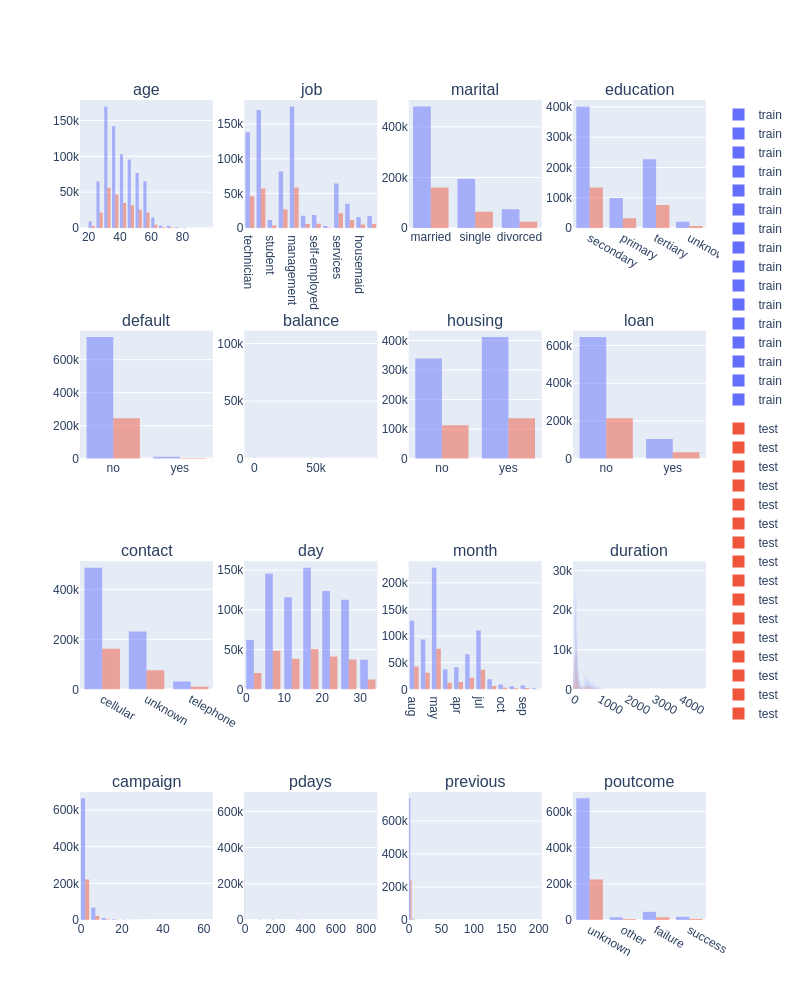

In [26]:
## сравниваем тест и трэйн
train_tst=pd.concat([train_df.drop('y', axis=1).assign(type='train'),test_df.assign(type='test')], axis=0)
fig=make_subplots(rows=4,cols=4, subplot_titles=[c for c in train_tst.columns[1:-1]])
for i,v in enumerate(train_tst.columns[1:-1]):
    # print(v)
    row=i//4+1
    col=i%4+1
    fig_i=px.histogram(train_tst[[v,'type']], x=v,color='type', barmode='overlay', title=v)
    
    for trace in fig_i.data:
        fig.add_trace(trace, row=row, col=col)
fig.update_layout(width=800,height=1000)
fig.show('png')



In [15]:
# 2
# print(test_df['y'].value_counts(normalize=True))
simple_params={'n_estimators':200, 'max_depth':5, 'learning_rate':0.05,'subsample':0.8,'colsamle_bytree':0.8,'random_state':42}
simple_lgb=lgb.LGBMClassifier(**simple_params)
simple_lgb.fit(X_train, y_train)
y_pred_simple=simple_lgb.predict_proba(X_val)[:,1]
auc_simple=roc_auc_score(y_val, y_pred_simple)
print(f"{simple_lgb} AUC - {auc_simple}")




[LightGBM] [Warning] Unknown parameter: colsamle_bytree
[LightGBM] [Warning] Unknown parameter: colsamle_bytree
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [16]:
print("Анализ признаков")

feat_importance=pd.DataFrame({'feature':X_train.columns,'importance':simple_lgb.feature_importances_})\
    .sort_values('importance',ascending=False)
display(feat_importance.head(10))
corr_with_target=[]
for col in X_train.columns:
    if X_train[col].dtype in ['int64','float64']:
        corr=np.corrcoef(X_train[col], y_train)[0,1]
        corr_with_target.append((col,abs(corr)))

corr_with_target.sort(key=lambda x: x[1], reverse=True)
corr_with_target#[:100]

Анализ признаков


,feature,importance
11,duration,1502
10,month,876
5,balance,598
13,pdays,543
9,day,447
0,age,388
19,poutcome_dop,203
8,contact,197
12,campaign,188
1,job,182


[('duration', 0.518732345042034),
 ('dur_important', 0.43308112506698143),
 ('poutcome_dop', 0.3072884182629541),
 ('month_dop', 0.22802161753605005),
 ('job_nopass_dop', 0.18061322067850472),
 ('no_passive_dop', 0.17460349207301332),
 ('balance', 0.12264947116925545),
 ('previous', 0.12219300875714711),
 ('job_dop', 0.11665919301708694),
 ('job_marital', 0.10564477022191793),
 ('education_marital_dop', 0.09595522601971057),
 ('pdays', 0.0888138091091765),
 ('education_dop', 0.08557782239897573),
 ('day_1_10_30', 0.07713454994910567),
 ('campaign', 0.07641931509472293),
 ('day', 0.04977040095989308),
 ('age', 0.010169161328066643)]

Проблема найдена!

Признак duration имеет корреляцию 0.52 с целевой переменной -  утечка


In [17]:
### Удаляем фичи
dur_cols=[c for c in X_train if 'dur' in c]
X_train_clean=X_train.drop(dur_cols,axis=1)
X_val_clean=X_val.drop(dur_cols, axis=1)
X_test_clean=X_test.drop(dur_cols, axis=1)


print(f"До {X_train_clean.shape[1]} после {X_train.shape[1]}")
# print(X_val_clean.shape[1], X_val.shape[1])
print(f"Do {X_test_clean.shape[1]} posle {X_test.shape[1]}")


До 24 после 26
Do 24 posle 26


In [18]:
simple_clean_lgb=lgb.LGBMClassifier(**simple_params)
simple_clean_lgb.fit(X_train_clean,y_train)
y_pred_clean=simple_clean_lgb.predict_proba(X_val_clean)[:,1]
auc_clean=roc_auc_score(y_val, y_pred_clean)
print(f"{simple_clean_lgb} AUC - {auc_clean}")

pd.DataFrame({'features':X_train_clean.columns,'importance':simple_clean_lgb.feature_importances_}).sort_values('importance', ascending=False)

[LightGBM] [Warning] Unknown parameter: colsamle_bytree
[LightGBM] [Warning] Unknown parameter: colsamle_bytree
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

,features,importance
5,balance,1083
10,month,797
12,pdays,784
9,day,673
0,age,520
11,campaign,408
1,job,250
8,contact,205
2,marital,185
18,poutcome_dop,127


In [19]:
corr_clean=[]
for c in X_train_clean:
    if X_train_clean[c].dtype in ['int64','float64']:
        corr=np.corrcoef(X_train_clean[c], y_train)[0,1]
        corr_clean.append((c,abs(corr)))
corr_clean.sort(key=lambda x: x[1], reverse=True)
corr_clean

[('poutcome_dop', 0.3072884182629541),
 ('month_dop', 0.22802161753605005),
 ('job_nopass_dop', 0.18061322067850472),
 ('no_passive_dop', 0.17460349207301332),
 ('balance', 0.12264947116925545),
 ('previous', 0.12219300875714711),
 ('job_dop', 0.11665919301708694),
 ('job_marital', 0.10564477022191793),
 ('education_marital_dop', 0.09595522601971057),
 ('pdays', 0.0888138091091765),
 ('education_dop', 0.08557782239897573),
 ('day_1_10_30', 0.07713454994910567),
 ('campaign', 0.07641931509472293),
 ('day', 0.04977040095989308),
 ('age', 0.010169161328066643)]

In [20]:
model_clean_results={}
model_clean_results[simple_clean_lgb]=round(auc_clean,4)

model_clean_results

{LGBMClassifier(colsamle_bytree=0.8, learning_rate=0.05, max_depth=5,
                n_estimators=200, random_state=42, subsample=0.8): 0.8425}

In [21]:
import shap
shap.initjs()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


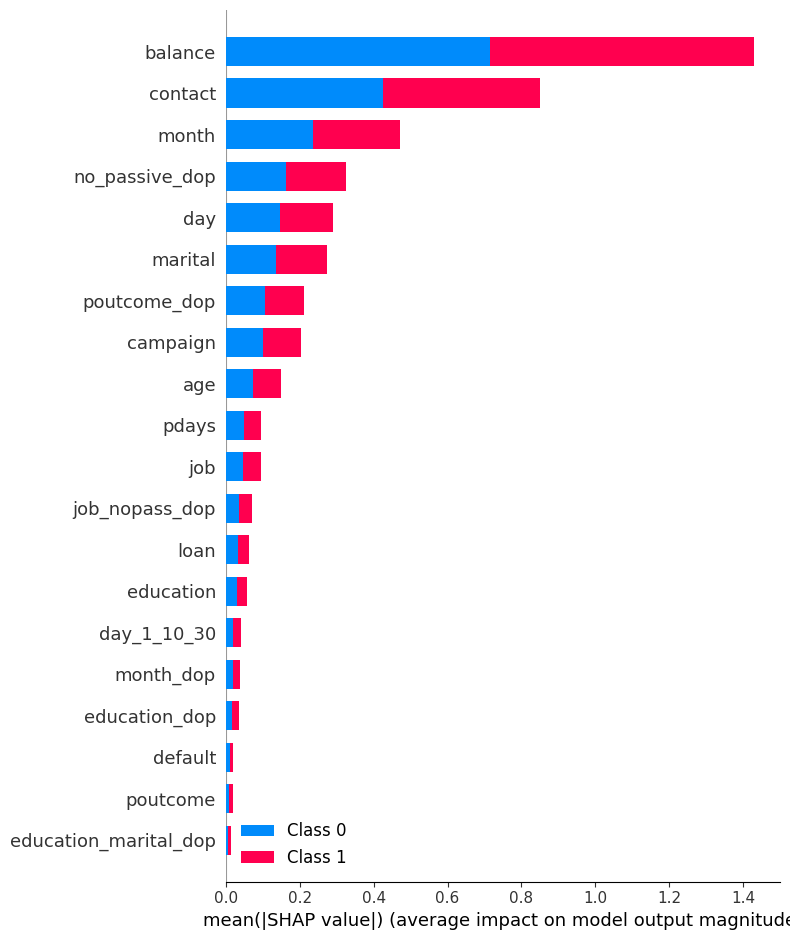

In [45]:
shap_values=shap.TreeExplainer(simple_clean_lgb).shap_values(X_train_clean)
shap.summary_plot(shap_values, X_train_clean)

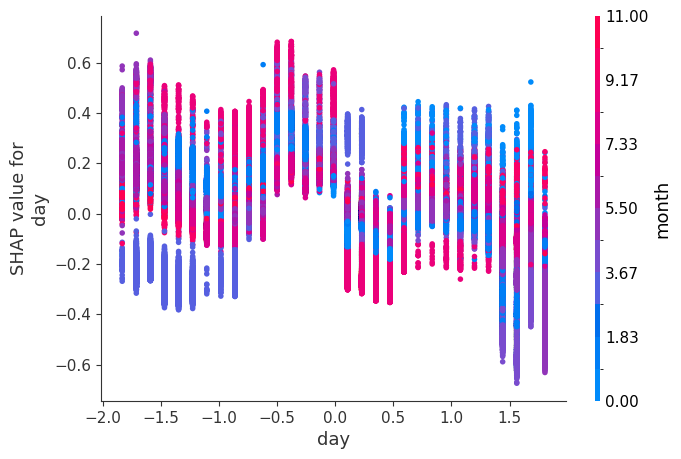

In [39]:
shap.dependence_plot('day',shap_values[1], X_train_clean)

In [ ]:
# X_train_clean['contact']
# label_enc['contact'].classes_


array(['cellular', 'telephone', 'unknown'], dtype=object)

In [22]:
### удаляем слабые фичи
# low_features=pd.DataFrame({'features':X_train_clean.columns,'importance': simple_clean_lgb.feature_importances_})#.query('importance<70')['features'].unique()
low_features=['default', 'poutcome','education_marital_dop']
X_train_cln_low=X_train_clean.drop(low_features, axis=1)
X_val_cln_low=X_val_clean.drop(low_features, axis=1)
X_test_cln_low=X_test_clean.drop(low_features, axis=1)

In [30]:
def create_features_1(df):
    df=df.copy()
    df['balance_bins']=pd.cut(df['balance'], bins=[-np.inf,0,1000,5000,+np.inf], labels=[0,1,2,3]).astype(int)
    df['balance_cellur']=((df['balance']>df['balance'].median())&(df['contact']==0)).astype(int)
    return df

X_train_1=create_features_1(X_train_clean)
X_val_1=create_features_1(X_val_clean)
print(X_train_1.shape[1])

def model_pred_1 (mod, data_train, data_val):
    lgb_1=mod
    lgb_1.fit(data_train,y_train)
    y_pred_1=lgb_1.predict_proba(data_val)[:,1]
    auc_=roc_auc_score(y_val, y_pred_1)
    return auc_


26


In [31]:
auc_1=model_pred_1(simple_clean_lgb, X_train_1, X_val_1)
auc_1

[LightGBM] [Warning] Unknown parameter: colsamle_bytree
[LightGBM] [Warning] Unknown parameter: colsamle_bytree
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

0.8425341308451141

In [33]:
%%time
### Оптимизация

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

def optimize_catboost():
    param_dist={
        'n_estimators':[200,300],
        'learning_rate':[0.05,0.1],
        'max_depth':[5,7]
    }

    search=RandomizedSearchCV(
        CatBoostClassifier(random_state=42, cat_features=cat_cols, verbose=False),
        param_dist, n_iter=5,cv=2, scoring='roc_auc',random_state=42,n_jobs=2
    )
    search.fit(X_train_1,y_train)
    return search.best_estimator_


def optimize_lgbm():
    param_dist={
        'n_estimators':randint(200,600),
        'learning_rate':uniform(0.05,0.1),
        'max_depth':randint(3,8),
        # 'max_leaves':randint(31,127),
        # 'subsample':uniform(0.7,0.3),
        # 'reg_alpha':uniform(0,1),
        # 'reg_lambda':uniform(0,1)
    }

    search=RandomizedSearchCV(
        LGBMClassifier(random_state=42),
        param_dist,n_iter=15,cv=3,scoring='roc_auc',random_state=42,n_jobs=-1
        )
    search.fit(X_train_1, y_train)
    return search.best_estimator_

def optimize_xgboost():
    param_dist={
        'n_estimators': randint(100,400),
        'learning_rate': uniform(0.05,0.1),
        'max_depth':randint(3,8),
        # 'subsample':uniform(0.7,0.3),
        # 'colsample_bytree':uniform(0.7,0.3),
        # 'gamma':uniform(0,1)
    }
    search=RandomizedSearchCV(
        XGBClassifier(random_state=42, eval_metric='logloss',enable_categorical=True),
        param_dist,n_iter=15,cv=3,scoring='roc_auc',random_state=42,n_jobs=-1
    )

    search.fit(X_train_1, y_train)
    return search.best_estimator_

print("Оптимизация Catboost")
catboost_optimized=optimize_catboost()
print(catboost_optimized)

print("Оптимизация XGboost")
xgb_optimized=optimize_xgboost()
print(xgb_optimized)

print("Оптимизация LGBM")
lgb_optimized=optimize_lgbm()
print(lgb_optimized)

optimized_stack=StackingClassifier([
    ('lgb_opt', lgb_optimized),
    # ('lgb_balanced', lgb_balanced),
    ('xgb_opt',xgb_optimized),
    ('catboost',catboost_optimized)
], final_estimator=LogisticRegression(),cv=3)

optimized_stack.fit(X_train_1,y_train)
y_pred_stack_opt=optimized_stack.predict_proba(X_val_1)[:,1]
auc_stack_opt=roc_auc_score(y_val, y_pred_stack_opt)

print(f"{optimized_stack} AUC - {auc_stack_opt:.4f}")

Оптимизация Catboost
Оптимизация XGboost


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08745401188473625, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=370, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Оптимизация LGBM


NameError: name 'LGBMClassifier' is not defined

In [42]:
import json
with open("model_res.json", 'w') as f:
    json.dump(model_result,f)